# Laboratory #03 : Filters and Edges

At the end of this laboratory, you would get familiarized with

*   Convolution
*   Image Filters
*   Edge detection

## **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import color, data, exposure, feature, filters, io, morphology, util, img_as_float
from skimage.util import random_noise

# Convolution
Hint: 
*   *convolve function is available in skimage.filters.edges module*

### Exercise:
*   Read 'camera' image from the data module
*   Convolve the image with a horizontal mask:  (1 x 15) with all values set to one.

Shell you  normalize the mask before convolving the image with it? Why?

What types the mask and the image should be? Justify your answer.

What is the range of values before and after the convolution?

In [ ]:
# solution

#camera image
image=data.camera()
image=img_as_float(image)

#mask
mask=np.ones((1,15)) #horizontal mask with ones

#convolution with mask
convolutionh=filters.edges.convolve(image, mask)

We notice that it is not necessary to normalize as we have converted the image to float, and therefore values can be out of the range. When we plot the image, the function plt.imshow() will automatically do the contrast enhancement to adjust the values.

In order to do that, we need that the image and the mask are saved as floats.

In [ ]:
print('Original image: min: ' + str(image.min()) + ' max: ' + str(image.max()))
print('Convolution ones: min: ' + str(round(convolutionh.min(),3)) + ' max: ' + str(round(convolutionh.max(),3)))

Original image: min: 0.0 max: 1.0
Convolution ones: min: 0.278 max: 14.38


As we mentioned, values can be out of range.

*   Convolve the image with a vertical mask:  (15 x 1) with  values set to one

In [ ]:
# solution

#mask
mask=np.ones((15,1)) #vertical mask with ones

#convolution with mask
convolutionv=filters.edges.convolve(image, mask)

*   Convolve the image with a 2D mask:  (15 x 15) with  values set to one

In [ ]:
#solution

#mask
mask=np.ones((15,15)) #2D mask with ones

#convolution with mask
convolution2D=filters.edges.convolve(image, mask)

*   Visualize the original image, horizontal convolution, vertical convolution, 2D convolution using matplotlib subplot.

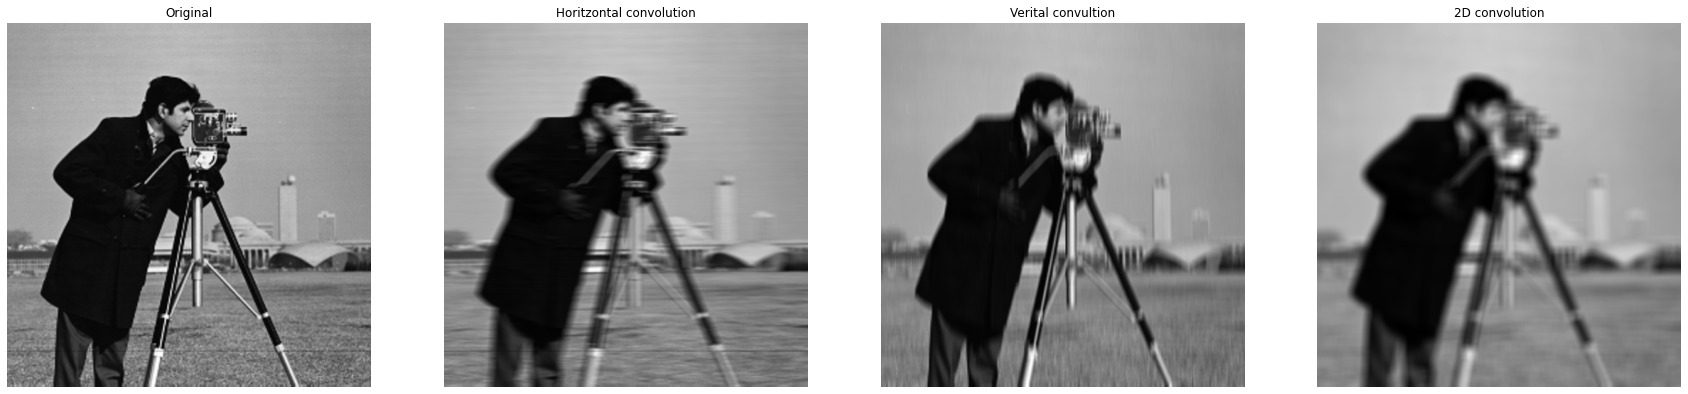

In [ ]:
# solution
fig, plot =plt.subplots(1,4, figsize=(30,14))
plot[0].imshow(image, cmap='gray')
plot[0].set_title('Original')
plot[0].axis('off')
plot[1].imshow(convolutionh, cmap='gray')
plot[1].set_title('Horitzontal convolution')
plot[1].axis('off')
plot[2].imshow(convolutionv, cmap='gray')
plot[2].set_title('Verital convultion')
plot[2].axis('off')
plot[3].imshow(convolution2D, cmap='gray')
plot[3].set_title('2D convolution')
plot[3].axis('off')
fig.show()


*   Apply 2 stage convolution: Horizontal mask (1 x 15) with all values set to 1 followed by vertical mask (15 x 1) with all values set to 1
*   Visualize the original image, 2D convolved image, 2 stage convolved image using matplotlib subplot.


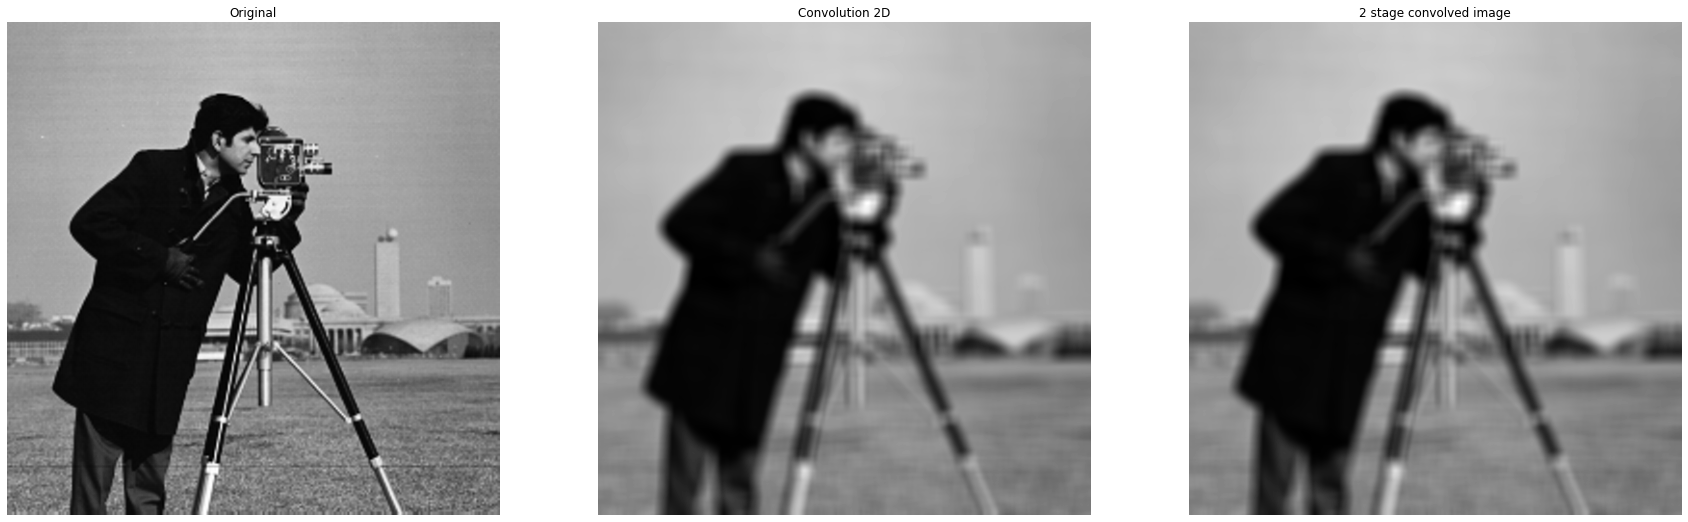

In [ ]:
# solution

#masks
mask1 = np.ones((1,15))
mask2 = np.ones((15,1))

#two convolutions
convolution1 = filters.edges.convolve(image, mask1)
convolution2 = filters.edges.convolve(convolution1, mask2)

#visualzation
fig, plots = plt.subplots(1,3 , figsize=(30,14))
plots[0].imshow(image , cmap='gray')
plots[0].set_title('Original')
plots[0].axis('off')
plots[1].imshow(convolution2D , cmap='gray')
plots[1].set_title('Convolution 2D')
plots[1].axis('off')
plots[2].imshow(convolution2, cmap='gray')
plots[2].set_title('2 stage convolved image')
plots[2].axis('off')
fig.show()

*   Is the result different from applying convolution with 2D mask (15 x 15) with all values set to 1?

**Solution**

No, we obtain exactly the same image. With the 2D mask, for píxel $[i,j]$ we obtain: 
$$df[i,j]=\sum_{n=-7}^7 \sum_{m=-7}^7 f[i+n, j+m]$$
Applying the horizontal mask:
$$df_h[i,j]=\sum_{n=-7}^7  f[i+n, j]$$
And then the vertical:
$$df_{vh}[i,j]= \sum_{m=-7}^7  df_h[i, j+m] = \sum_{m=-7}^7  \sum_{n=-7}^7  f[i+n, j+m] = \sum_{n=-7}^7 \sum_{m=-7}^7 f[i+n, j+m]$$


# Image Blurring




### Exercise: Gaussian Filter
*   Read 'astronaut' image from the data module
*   Shell you convert the image into grayscale?
*   Apply a gaussian filter with sigma=1
*   Hint: *gaussian function is available in skimage.filters module*

In [ ]:
# solution

#Astronaut image
image = data.astronaut()
image = img_as_float(image)

It is not necessary to convert the image into grayscale, as Gaussian filters can be applied to color images. In this case, what it does is to apply the filter in each channel.

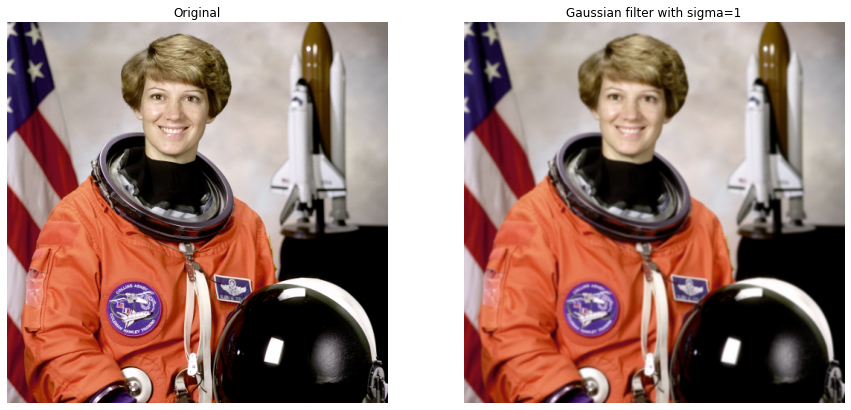

In [ ]:
#Gaussian filter with sigma=1
gaussian_image_s1=filters.gaussian(image, sigma=1, multichannel=True)

#plotting
fig, plots = plt.subplots(1,2, figsize=(15,7))
plots[0].imshow(image)
plots[0].set_title('Original')
plots[0].axis('off')
plots[1].imshow(gaussian_image_s1)
plots[1].set_title('Gaussian filter with sigma=1')
plots[1].axis('off')
fig.show()

*   Why is blurring important?


**Solution**

The main use of blurring is to eliminate noise. With gaussian filter we achieve that the image is smoothed and therefore, noise, which in general are outliers can be reduced (mixed with the other points).

*   Apply a gaussian filter with sigma=0. What is the result of this operation?

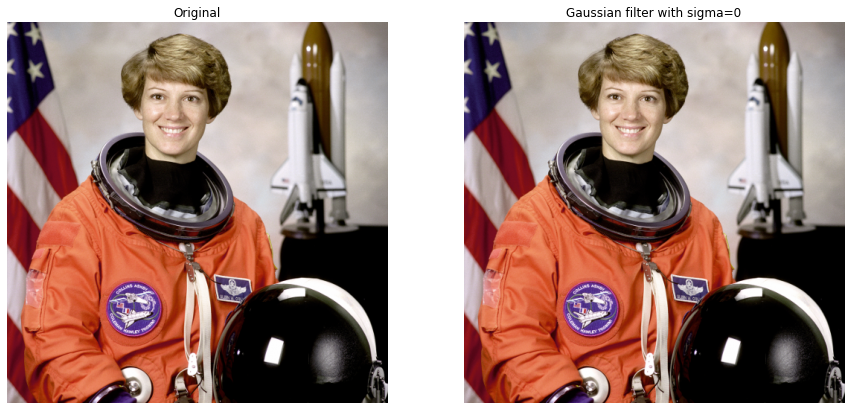

In [ ]:
# solution

gaussian_image_s0=filters.gaussian(image, sigma=0, multichannel=True)

#plotting
fig, plots = plt.subplots(1,2, figsize=(15,7))
plots[0].imshow(image, cmap='gray')
plots[0].set_title('Original')
plots[0].axis('off')
plots[1].imshow(gaussian_image_s0 , cmap='gray')
plots[1].set_title('Gaussian filter with sigma=0')
plots[1].axis('off')
fig.show()

We obtain the same image. This is because, if we have a 2D Gaussian function 
$$h(u,v)=\frac{1}{2\pi \sigma ^2}e^{-\frac{u^2+v^2}{\sigma ^2}}$$
And we calculate the limit when $\sigma \rightarrow 0 $, we have:
$$\lim_{\sigma \rightarrow 0}h(u,v) = \begin{cases} 1 & if (u,v)=(0,0) \\ 0 & otherwise \end{cases}$$
Therefore, is like we didn't have any filter.

*   Vary the value of sigma in the gaussian filter. Apply sigma=0.25, 0.5, 1, 1.5, 2, 5
*   Visualize the different results using matplotlib subplot.

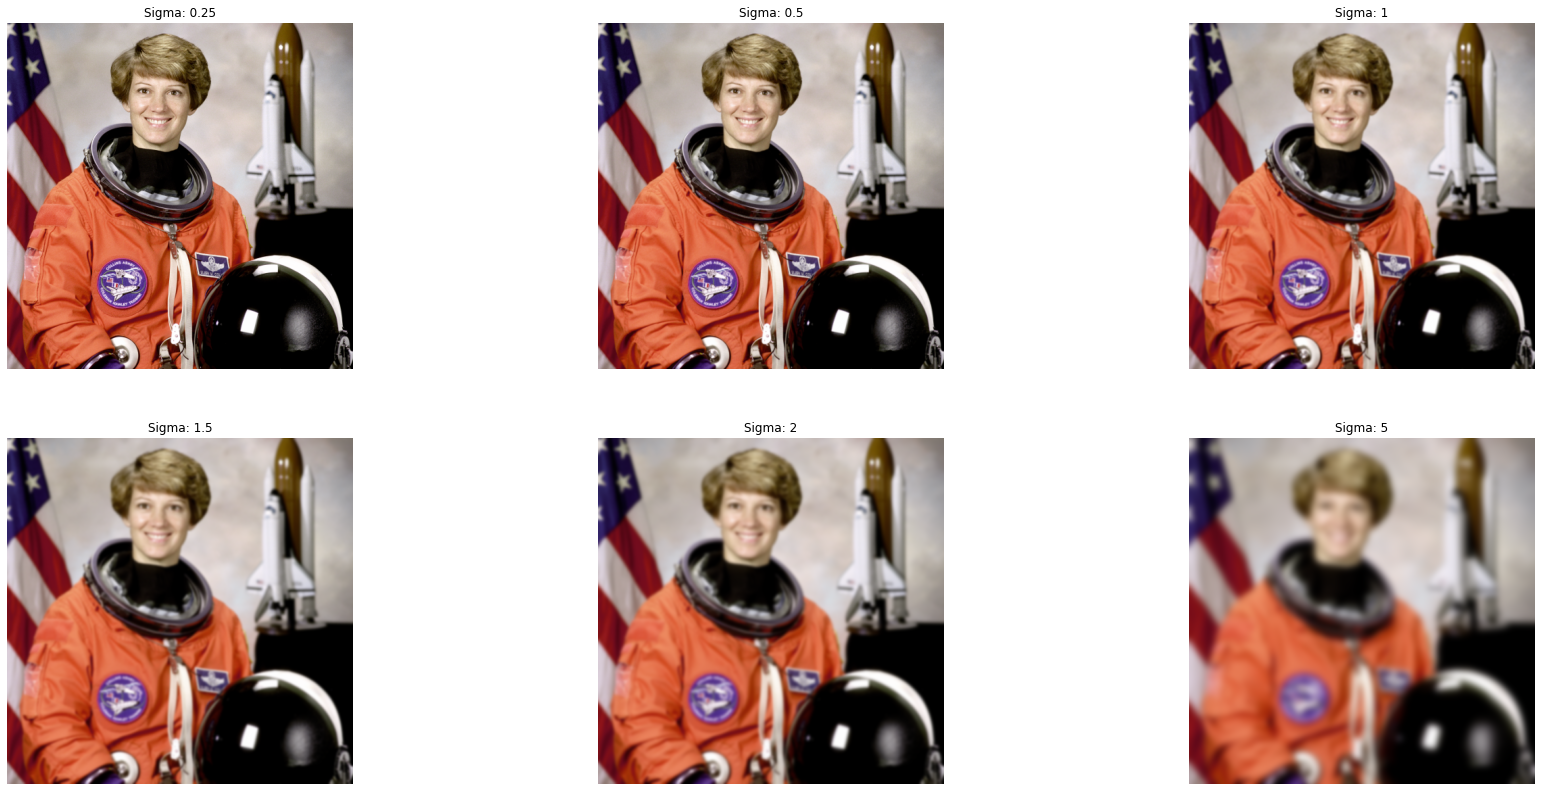

In [ ]:
# solution
fig, plots = plt.subplots(2,3,figsize=(30,14))
plots[0][0].imshow(filters.gaussian(image,0.25, multichannel=True), cmap='gray')
plots[0][0].set_title('Sigma: 0.25')
plots[0][0].axis('off')
plots[0][1].imshow(filters.gaussian(image,0.5, multichannel=True), cmap='gray')
plots[0][1].set_title('Sigma: 0.5')
plots[0][1].axis('off')
plots[0][2].imshow(filters.gaussian(image,1, multichannel=True), cmap='gray')
plots[0][2].set_title('Sigma: 1')
plots[0][2].axis('off')
plots[1][0].imshow(filters.gaussian(image,1.5, multichannel=True), cmap='gray')
plots[1][0].set_title('Sigma: 1.5')
plots[1][0].axis('off')
plots[1][1].imshow(filters.gaussian(image,2, multichannel=True), cmap='gray')
plots[1][1].set_title('Sigma: 2')
plots[1][1].axis('off')
plots[1][2].imshow(filters.gaussian(image,5, multichannel=True), cmap='gray')
plots[1][2].set_title('Sigma: 5')
plots[1][2].axis('off')
fig.show()

*    What happens when a larger sigma value is used and what happens when a smaller sigma value is used in the gaussian filter?
*    What determines the optimal sigma value?




**Solution**

The larger sigma is the blurred the resulting image. Looking at the gaussian function:
$$h(u,v)=\frac{1}{2\pi \sigma ^2}e^{-\frac{u^2+v^2}{\sigma ^2}}$$
We notice that when $\sigma$ grows the function also grows (except for $(u,v)\neq (0,0)$), and then it becomes wider. 

It depends on the picture and the size of the mask. But in general it cannot be to big as then blurring is to much, or to small as then the filter does not make much effect.


### Exercise: Median Filter

*   Apply median filter with a disk structuring element of radius 1, 5, 10
*   Shell you convert the 'astronauts' image to grayscale?
*   Visualize the original image and the filtered image matplotlib subplot.

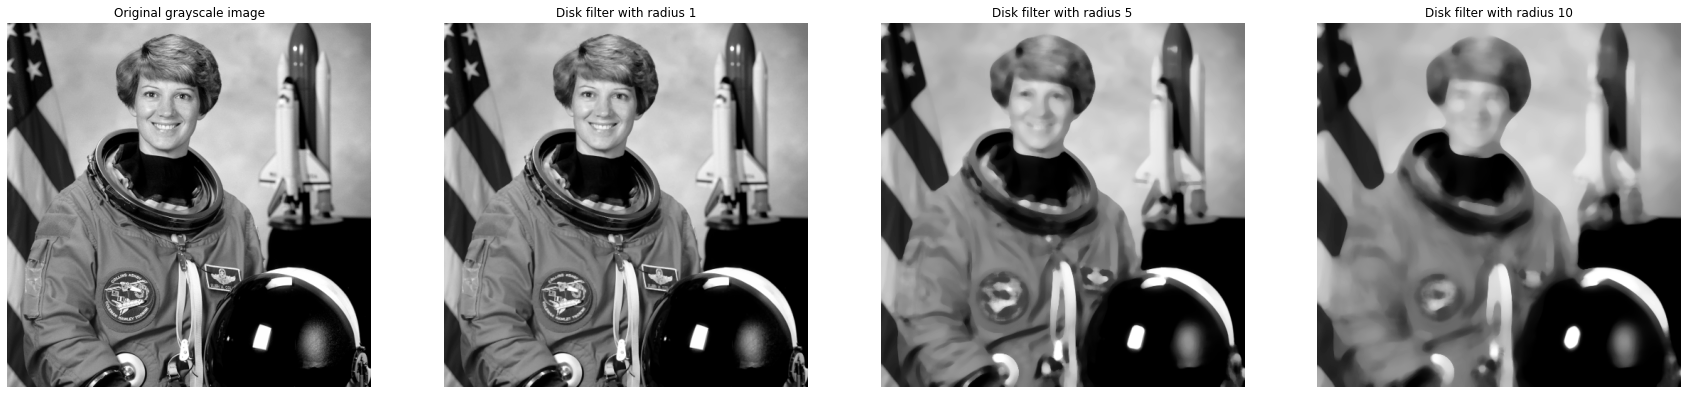

In [ ]:
# solution
image = color.rgb2gray(data.astronaut())

fig, plots = plt.subplots(1,4, figsize=(30,14))
plots[0].imshow(image, cmap='gray')
plots[0].set_title("Original grayscale image")
plots[0].axis('off')
plots[1].imshow(filters.median(image, selem=morphology.selem.disk(1)), cmap='gray')
plots[1].set_title("Disk filter with radius 1")
plots[1].axis('off')
plots[2].imshow(filters.median(image, selem=morphology.selem.disk(5)), cmap='gray')
plots[2].set_title("Disk filter with radius 5")
plots[2].axis('off')
plots[3].imshow(filters.median(image, selem=morphology.selem.disk(10)), cmap='gray')
plots[3].set_title("Disk filter with radius 10")
plots[3].axis('off')
fig.show()

In this case we need to convert the image to grayscale as the function filters.median() needs a grayscale image (we cannot calculate the median with 3 channels).

*   Change the structuring element to square, rectangle and diamond
*   Visualize the original image and the filtered image using matplotlib

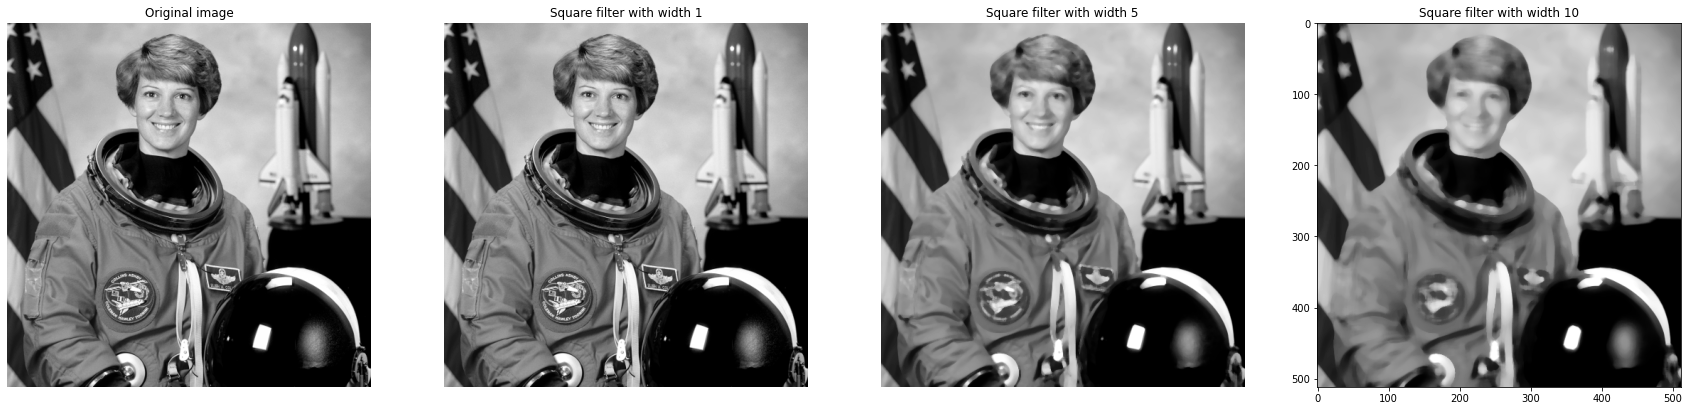

In [ ]:
# solution
# --------------- square ---------------
# solution
fig, plots = plt.subplots(1,4, figsize=(30,14))
plots[0].imshow(image, cmap='gray')
plots[0].set_title("Original image")
plots[0].axis('off')
plots[1].imshow(filters.median(image, selem=morphology.selem.square(1)), cmap='gray')
plots[1].set_title("Square filter with width 1")
plots[1].axis('off')
plots[2].imshow(filters.median(image, selem=morphology.selem.square(5)), cmap='gray')
plots[2].set_title("Square filter with width 5")
plots[2].axis('off')
plots[3].imshow(filters.median(image, selem=morphology.selem.square(10)), cmap='gray')
plots[3].set_title("Square filter with width 10")
fig.show() 


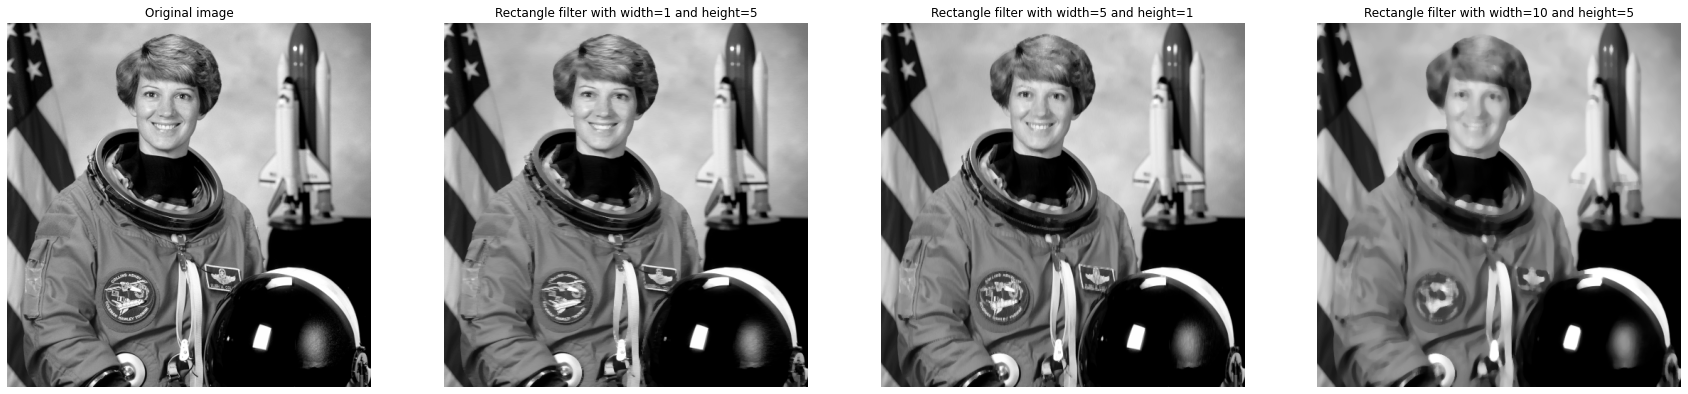

In [ ]:
# --------------- rectangle ---------------
# solution
fig, plots = plt.subplots(1,4, figsize=(30,14))
plots[0].imshow(image, cmap='gray')
plots[0].set_title("Original image")
plots[0].axis('off')
plots[1].imshow(filters.median(image, selem=morphology.selem.rectangle(1,5)), cmap='gray')
plots[1].set_title("Rectangle filter with width=1 and height=5")
plots[1].axis('off')
plots[2].imshow(filters.median(image, selem=morphology.selem.rectangle(5,1)), cmap='gray')
plots[2].set_title("Rectangle filter with width=5 and height=1")
plots[2].axis('off')
plots[3].imshow(filters.median(image, selem=morphology.selem.rectangle(10,5)), cmap='gray')
plots[3].set_title("Rectangle filter with width=10 and height=5")
plots[3].axis('off')
fig.show()

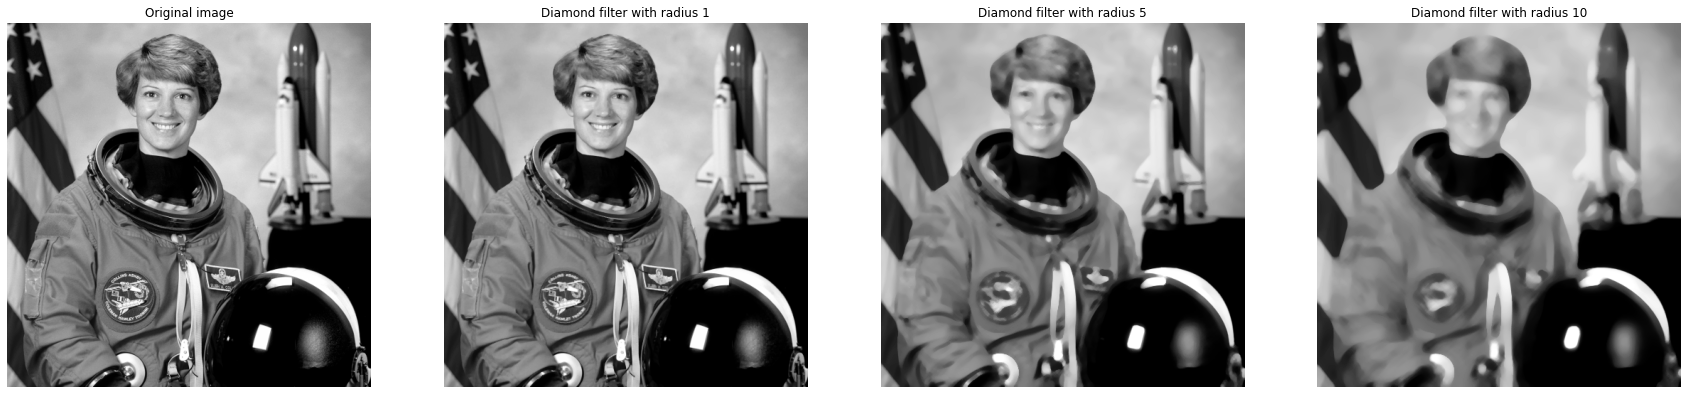

In [ ]:
# --------------- diamond ---------------
# solution
fig, plots = plt.subplots(1,4, figsize=(30,14))
plots[0].imshow(image, cmap='gray')
plots[0].set_title("Original image")
plots[0].axis('off')
plots[1].imshow(filters.median(image, selem=morphology.selem.diamond(1)), cmap='gray')
plots[1].set_title("Diamond filter with radius 1")
plots[1].axis('off')
plots[2].imshow(filters.median(image, selem=morphology.selem.diamond(5)), cmap='gray')
plots[2].set_title("Diamond filter with radius 5")
plots[2].axis('off')
plots[3].imshow(filters.median(image, selem=morphology.selem.diamond(10)), cmap='gray')
plots[3].set_title("Diamond filter with radius 10")
plots[3].axis('off')
fig.show()

*   What is the effect of the structuring element on the median filter?


**Solution**

The shape of the structure surrounding a pixel in which the median will be calculated to replace it in the filtered image. (e.g. if it is rectangular the median will be calculated over the rectangle surrounding the pixel).

*   What is the difference between the gaussian filter, mean filter and median filter?
*   Provide an example where each one would be used.


**Solution**

For one side, mean filter convolutes with a uniform mask, this means that in the filtered image each pixel is the simple average of the other pixels in the mask, they all have the same influence; whereas Gaussian filter uses a mask calculated with a Gaussian distribution, that is, the nearest points have more effect. On the other side, median filter does not use a convolution with a mask, and each pixel is replaced by the median of its structuring element.

In the following exercise we will see examples where each one is best. However, in general, when we have salt and pepper noise we use median filter, if the original signal is low frequency then the gaussian or mean filter are best choices.

Now we will see an example where each one is used.

...

/usr/local/lib/python3.7/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


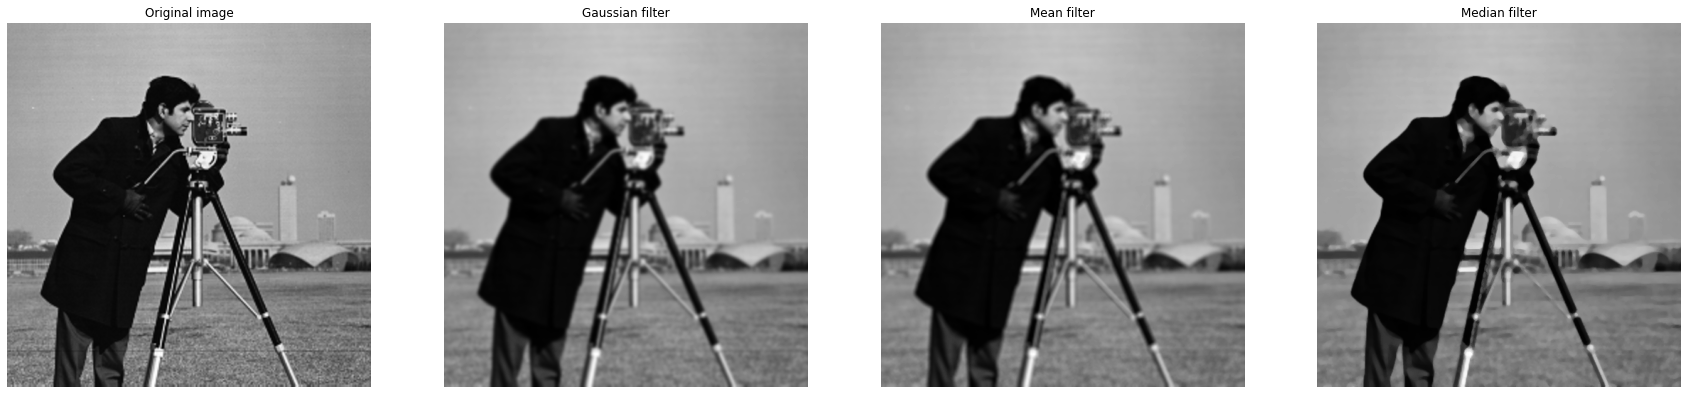

In [ ]:
fig, plot = plt.subplots(1,4, figsize=(30,14))

#original image
image=img_as_float(data.camera())
plot[0].imshow(image, cmap='gray')
plot[0].set_title('Original image')
plot[0].axis('off')

#gaussian filter
plot[1].imshow(filters.gaussian(image, sigma=2), cmap='gray')
plot[1].set_title('Gaussian filter')
plot[1].axis('off')

#mean filter
plot[2].imshow(filters.rank.mean(image, selem=morphology.selem.disk(4)), cmap='gray')
plot[2].set_title('Mean filter')
plot[2].axis('off')

#median filter
plot[3].imshow(filters.median(image, selem=morphology.selem.disk(4)), cmap='gray')
plot[3].set_title('Median filter')
plot[3].axis('off')

fig.show()

### Exercise: Effect of noise

It is easy to add noise to an image using the random_noise function available in skimage.util

*   Create noisy images with **gaussian** noise.
*   Apply the mean filter, median filter and gaussian filter in each of the noisy images.
*   Repeat the same on a noisy images with **salt and pepper** noise.
*   Visualize the images and observe the difference in each filter with respect to the noise.

/usr/local/lib/python3.7/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


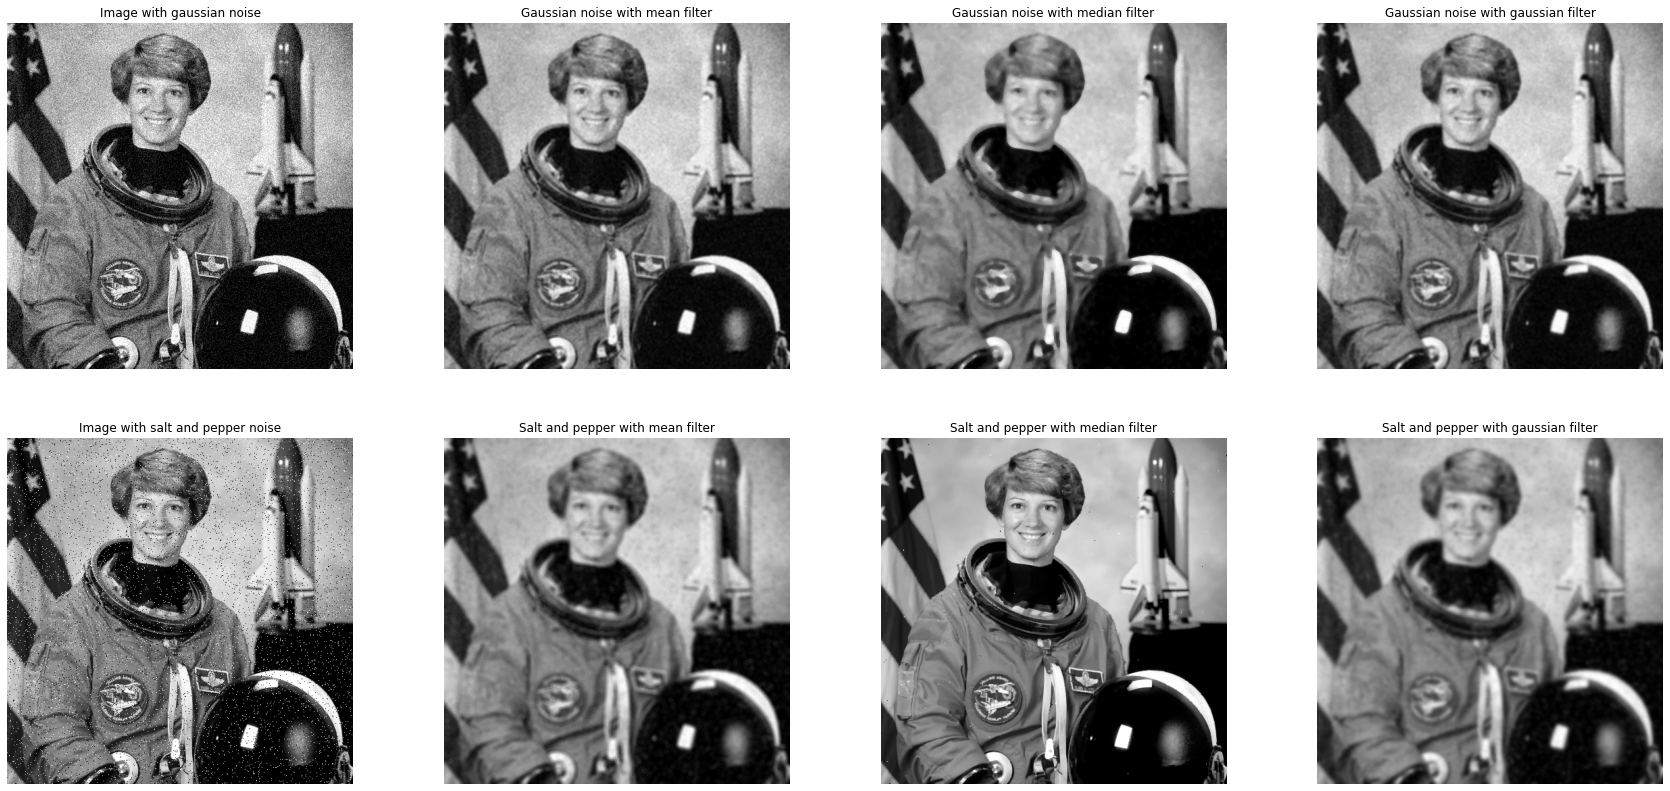

In [ ]:
# solution
from skimage.util import random_noise
image = data.astronaut()
image = color.rgb2gray(image) #image to grayscale

fig, plot = plt.subplots(ncols=4, nrows=2, figsize=(30, 14))

#images with noise
img_noise_ga = random_noise(image, mode='gaussian')  # gaussian noise is added
plot[0][0].imshow(img_noise_ga, cmap='gray')
plot[0][0].set_title('Image with gaussian noise')
plot[0][0].axis('off')
img_noise_sp = random_noise(image, mode='s&p')  # salt and pepper noise is added
plot[1][0].imshow(img_noise_sp, cmap='gray')
plot[1][0].set_title('Image with salt and pepper noise')
plot[1][0].axis('off')

#mean filter
plot[0][1].imshow(filters.rank.mean(img_noise_ga, selem=morphology.selem.disk(2.5)), cmap='gray')
plot[0][1].set_title('Gaussian noise with mean filter')
plot[0][1].axis('off')
plot[1][1].imshow(filters.rank.mean(img_noise_sp, selem=morphology.selem.disk(4)), cmap='gray')
plot[1][1].set_title('Salt and pepper with mean filter')
plot[1][1].axis('off')

#median filter
plot[0][2].imshow(filters.median(img_noise_ga, selem=morphology.selem.disk(4)), cmap='gray')
plot[0][2].set_title('Gaussian noise with median filter')
plot[0][2].axis('off')
plot[1][2].imshow(filters.median(img_noise_sp, selem=morphology.selem.disk(1)), cmap='gray')
plot[1][2].set_title('Salt and pepper with median filter')
plot[1][2].axis('off')

#gaussian filter
plot[0][3].imshow(filters.gaussian(img_noise_ga, sigma=1.5), cmap='gray')
plot[0][3].set_title('Gaussian noise with gaussian filter')
plot[0][3].axis('off')
plot[1][3].imshow(filters.gaussian(img_noise_sp, sigma=2.5), cmap='gray')
plot[1][3].set_title('Salt and pepper with gaussian filter')
plot[1][3].axis('off')


fig.show()

*   Which filter works better for gaussian noise and which filter works better for salt and pepper noise? Explain your choice of the filter for that particular type of noise.


**Solution**

With Gaussian noise we need big masks sizes/ high sigmas to reduce noise, this results in more blurring. Considering this, we would say that Gaussian filter is the best, as nearer points have more effect. 

For salt and pepper noise, black and white pixels are added, in this case clearly median filter is the best as it does not create new colors appearing as a result of calculating an average with extreme colors.

...

# Edge Detection

### Exercise:
*   Read the 'camera' image from the data module
*   Perform sobel and prewitt edge detection on the image
*   Compare the buildin function performance vs applying a convolution with the Sobel/Prewitt mask
*   Visualize the original image, the edges and the edges superimposed on the original image

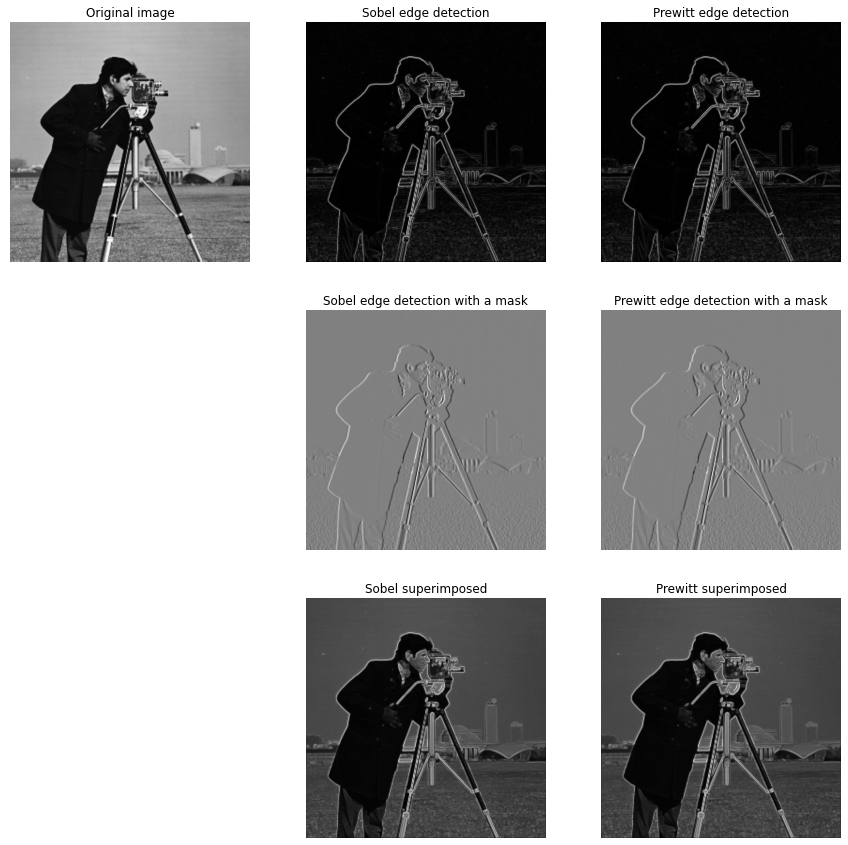

In [25]:
# solution
fig, plot =plt.subplots(3,3, figsize=(15,15))

#original image
image=data.camera()
image=img_as_float(image) 
plot[0,0].imshow(image, cmap='gray')
plot[0,0].set_title('Original image')
plot[0,0].axis('off')

#Sobel edge detection
image_so_v=filters.sobel(image)
plot[0,1].imshow(image_so_v, cmap='gray')
plot[0,1].set_title('Sobel edge detection')
plot[0,1].axis('off')

#Prewitt edge detection
image_pre_v=filters.prewitt(image)
plot[0,2].imshow(image_pre_v, cmap='gray')
plot[0,2].set_title('Prewitt edge detection')
plot[0,2].axis('off')

plot[1,0].axis('off')

##Sobel edge detection with a mask
mask_so_v=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
so_convolution=filters.edges.convolve(image, mask_so_v) 
plot[1,1].imshow(so_convolution, cmap='gray')
plot[1,1].set_title('Sobel edge detection with a mask')
plot[1,1].axis('off')

##Prewitt edge detection with a mask
mask_pr_v=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
pr_convolution=filters.edges.convolve(image, mask_pr_v) 
plot[1,2].imshow(pr_convolution, cmap='gray')
plot[1,2].set_title('Prewitt edge detection with a mask')
plot[1,2].axis('off')

plot[2,0].axis('off')

#Sobel edges superimposed on the original image
plot[2,1].imshow(image+3*image_so_v, cmap='gray')
plot[2,1].set_title('Sobel superimposed')
plot[2,1].axis('off')

#Prewitt edges superimposed on the original image
plot[2,2].imshow(image+3*image_pre_v, cmap='gray')
plot[2,2].set_title('Prewitt superimposed')
plot[2,2].axis('off')

fig.show()


*   What is the difference between each of the edge detectors?
*   What do you think is the limitation of each of the detector?



**Solution**

Sobel uses non-uniform weights, and so give more importance to the closest neighbors, while Prewitt gives the same importance in all the points of the mask (without considering the distance).

Sobel detector has problems with noise, as noise creates a contrast and then Sobel provides inaccurate results.

Prewitt and Sobel have problems with thin detection and smoothed images.

### Exercise: Canny edge detector
*   Read 'camera' image from the data module
*   Apply the Canny operator with default parameters
*   Apply the Canny by varying sigma=1, 3, 5, 10
*   Visualize the original image along with the edges detected using matplotlib.


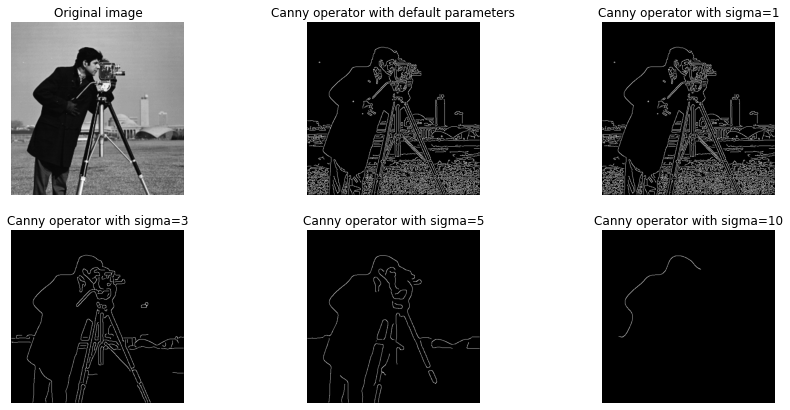

In [ ]:
# solution
fig, plot =plt.subplots(2,3, figsize=(15,7))

#original image
image=data.camera()
image=img_as_float(image)
plot[0][0].imshow(image, cmap='gray')
plot[0][0].set_title('Original image')
plot[0][0].axis('off')

#Canny operator with default parameters
im_canny_def=feature.canny(image)
plot[0][1].imshow(im_canny_def, cmap='gray')
plot[0][1].set_title('Canny operator with default parameters')
plot[0][1].axis('off')

#Canny operator with sigma=1
im_canny_s1=feature.canny(image, sigma=1)
plot[0][2].imshow(im_canny_s1, cmap='gray')
plot[0][2].set_title('Canny operator with sigma=1')
plot[0][2].axis('off')

#Canny operator with sigma=3
im_canny_s3=feature.canny(image, sigma=3)
plot[1][0].imshow(im_canny_s3, cmap='gray')
plot[1][0].set_title('Canny operator with sigma=3')
plot[1][0].axis('off')

#Canny operator with sigma=5
im_canny_s5=feature.canny(image, sigma=5)
plot[1][1].imshow(im_canny_s5, cmap='gray')
plot[1][1].set_title('Canny operator with sigma=5')
plot[1][1].axis('off')

#Canny operator with sigma=10
im_canny_s10=feature.canny(image, sigma=10)
plot[1][2].imshow(im_canny_s10, cmap='gray')
plot[1][2].set_title('Canny operator with sigma=10')
plot[1][2].axis('off')

fig.show()

*   What is the effect of varying the sigma values on the edges?
*   What do the high threshold and low threshold parameters denote?
*   Does the Canny operator work on color images?


**Solution**

With larger sigmas contrast has to be bigger to be detected. For example, if we look at the picture with sigma=1, we can see that even the texture of the grass has been detected, on the other side, when sigma=10 the only thing that has been detected is the contrast between the dark coat and light sky.

We use a high threshold to look for the highest contrasts, however, this lines may not be closed curves, then we use a low threshold to continue them and close them.

Canny algorithm does not work for color images as it detects the contrast in grayscale, it only works with 2D arrays.

*   What is the algorithm behind the Canny operator?


**Solution**

The Canny filter is a multi-stage edge detector. It uses a filter based on the derivative of a Gaussian in order to compute the intensity of the gradients.The Gaussian reduces the effect of noise present in the image. Then, potential edges are thinned down to 1-pixel curves by removing non-maximum pixels of the gradient magnitude. Finally, edge pixels are kept or removed using hysteresis thresholding on the gradient magnitude.

...


---

## **End of P3: Filters and Edges**
Deadline for P3 submission in CampusVirtual is: **Monday, the 25th of October, 2021**
